In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, '..')


### Load Data

In [2]:
roles_wide = pd.read_csv("../../../dataV2/combined_V1_V2.csv", na_filter=False)
roles_wide.drop("Unnamed: 0", inplace=True, axis=1)

roles_wide.rename({"Sentence": "sentence", "Arg.Phrase": "arg"}, axis=1, inplace=True)

properties_list = ['awareness', 'change_of_location', 'change_of_state',
       'change_of_possession', 'existed_after', 'existed_before',
       'existed_during', 'instigation', 'sentient', 'volition']

print(roles_wide.shape)
roles_wide["combined_labels"] = roles_wide["combined_labels"].apply(lambda x: eval(x))
roles_wide.head()


(24906, 18)


,Sentence.ID,Roleset,Gram.Func,sentence,Predicate,Split,arg,Arg.Stripped,Arg,arg_idx,verb_idx,structure,decomp_version,Pred.Lemma,modified_sentence,Arg.Tokens.Begin,combined_labels,VN_mappings
0,0003_21,impose.01,nsubj,"In July , a gradual ban was imposed by the Env...",was imposed by,test,a gradual ban,a ban,1,"(3, 6)","(6, 9)",passive_full,V1,impose,1,,"[1.0, 1.0, 3.0, 1.0, 5.0, 1.0, 5.0, 1.0, 1.0, ...",
1,0003_21,impose.01,dobj,"In July , a gradual ban was imposed by the Env...",was imposed by,train,the Environmental Protection Agency,the Environmental Protection Agency,0,"(9, 13)","(6, 9)",passive_full,V1,impose,1,,"[5.0, 1.0, 3.0, 1.0, 5.0, 5.0, 5.0, 5.0, 1.0, ...",
2,0003_29,have.03,nsubj,No bearing on our work force today is had by it .,is had by,train,No bearing on our work force today,no bearing,1,"(0, 7)","(7, 10)",passive_full,V1,have,1,,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",
3,0003_29,have.03,dobj,No bearing on our work force today is had by it .,is had by,test,it,It,0,"(10, 11)","(7, 10)",passive_full,V1,have,1,,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, ...",
4,0003_9,lead.02,nsubj,A team of researchers from the National Cancer...,was led by,train,A team of researchers from the National Cancer...,a team,1,"(0, 19)","(19, 22)",passive_full,V1,lead,1,,"[5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 5.0, 3.0, 1.0, ...",


In [3]:
eval_df = roles_wide.loc[
    (roles_wide["decomp_version"] == "V2") & \
    (roles_wide["Split"] == "test")
    ][["Pred.Lemma", "Gram.Func", "structure", "sentence", "Predicate", "arg_idx", "verb_idx", "arg", "Arg.Stripped", "Sentence.ID"]].reset_index().drop_duplicates()[[
        "index", "Pred.Lemma", "Sentence.ID", "Gram.Func", "Arg.Stripped",
        "arg", "sentence"]]

print(eval_df.shape)
eval_df.head()


(1270, 7)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .
1,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .
2,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .
3,14302,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .
4,14303,be,en-ud-test.conllu 1004,nsubj,that,that,""" I 'm afraid not , "" explains Winston , "" tha..."


In [4]:
verbnet_semantics = pd.read_csv("../../../dataV2/pd_verbnet_semantics.csv",
                                na_filter=False, index_col=0)[[
                                    "Sentence.ID", "Pred.Lemma", "Arg.Stripped", "has_mapping",
                                    "animate_STR", "animate_WK",
                                    "verb_possession", "verb_location", "verb_state",
                                ] + properties_list]
verbnet_semantics.head()

eval_df = pd.merge(eval_df, verbnet_semantics,
                   on=["Sentence.ID", "Pred.Lemma", "Arg.Stripped"])
print(eval_df.shape)
eval_df.head()


(2528, 23)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,awareness,change_of_location,change_of_state,change_of_possession,existed_after,existed_before,existed_during,instigation,sentient,volition
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,5.0,2.0,3.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,5.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0
2,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,5.0,2.0,3.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0
3,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,5.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0
4,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,1.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0


In [5]:
roberta_pred = pd.read_csv("../../evaluate/roberta_pred.csv", index_col=0)
roberta_pred = roberta_pred[[
    "Sentence.ID", "Pred.Lemma", "Gram.Func", "arg", "sentence", "model_pred"
]]

merged_roberta_pred = pd.merge(eval_df, roberta_pred,
                   on=["Sentence.ID", "Pred.Lemma", "Gram.Func", "arg", "sentence"], 
                   validate="many_to_one")["model_pred"].apply(eval).tolist()

merged_roberta_pred = pd.DataFrame(merged_roberta_pred, columns=map(lambda x: "roberta_" + x, properties_list))
eval_df[merged_roberta_pred.columns] = merged_roberta_pred

eval_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,roberta_awareness,roberta_change_of_location,roberta_change_of_state,roberta_change_of_possession,roberta_existed_after,roberta_existed_before,roberta_existed_during,roberta_instigation,roberta_sentient,roberta_volition
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
2,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
3,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
4,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


In [6]:
gpt_pred = pd.read_csv("../../evaluate/gpt_pred.csv", index_col=0)
gpt_pred = gpt_pred[[
    "Sentence.ID", "Pred.Lemma", "Gram.Func", "arg", "sentence", "model_pred"
]]

merged_gpt_pred = pd.merge(eval_df, gpt_pred,
                   on=["Sentence.ID", "Pred.Lemma", "Gram.Func", "arg", "sentence"], 
                   validate="many_to_one")["model_pred"].apply(eval).tolist()

merged_gpt_pred = pd.DataFrame(merged_gpt_pred, columns=map(lambda x: "gpt_" + x, properties_list))
eval_df[merged_gpt_pred.columns] = merged_gpt_pred

eval_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_awareness,gpt_change_of_location,gpt_change_of_state,gpt_change_of_possession,gpt_existed_after,gpt_existed_before,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
2,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
3,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
4,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


## Animacy selectional restrictions

### roberta-dropout=0.1

In [7]:
contributions_df = pd.read_csv("roberta_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["sentient", "instigation", "volition", "awareness"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    # "modifier": "mod",
    "modifier": np.nan,
    "predicate": "pred",
    # "other_arguments": "other"
    "other_arguments": np.nan
}

contributions_df["span"] = contributions_df["span"].map(spans)
contributions_df = contributions_df.dropna(subset="span")

print(contributions_df.shape)
contributions_df.head()


(10112, 6)


,index,span,class,per_token_contribution,position,property
0,14299,arg,negative,-0.000000,agent,awareness
1,14301,arg,negative,3.703817,patient,awareness
2,14303,arg,negative,0.756581,agent,awareness
3,14305,arg,negative,-0.000000,agent,awareness
4,14307,arg,negative,-0.000000,agent,awareness


In [8]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(20040, 48)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_existed_before,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.0,agent,awareness
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,-0.0,agent,awareness
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.0,agent,instigation
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,-0.0,agent,instigation
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.0,agent,sentient


In [9]:
contributions_df["animate_WK"] = contributions_df.apply(
    lambda x: x["animate_WK"], axis=1
)
contributions_df["animate_STR"] = contributions_df.apply(
    lambda x: x["animate_STR"], axis=1
)

# keep only rows where the predicted property is >3 and the contribution is to that property
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x["roberta_" + x["property"]]) == 2, axis=1
)

print(contributions_df.shape)
contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]
contributions_df.head()


(20040, 49)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property,has_contribution_property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,arg,negative,-0.0,agent,awareness,True
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,pred,negative,-0.0,agent,awareness,True
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,arg,negative,-0.0,agent,instigation,True
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,pred,negative,-0.0,agent,instigation,True
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,arg,negative,-0.0,agent,sentient,True


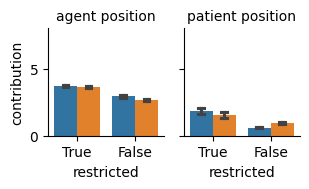

In [10]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & (contributions_df["class"] == "positive")
        ],
    hue="span", orient="v", kind="bar",
    col="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=2, aspect=0.8,
    x="animate_WK",
    legend=False
    )
plt.ylim(0, 8)
ax.set_ylabels("contribution")
ax.set_xlabels("restricted")
ax.set_titles("{col_name} position")

# ax.set_titles("")


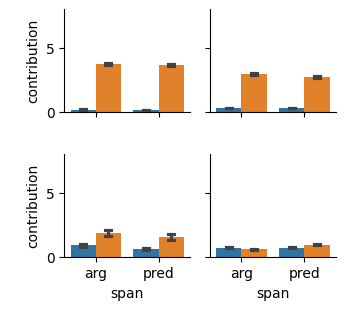

In [11]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1,
    col="animate_WK", legend_out=True, hue = "class", 
    # margin_titles=True
    # order=["arg", "mod", "pred", "other"]
    legend=False
    )
plt.ylim(0, 8)
ax.set_ylabels("\ncontribution")
# ax.set_titles("lexical={col_name} | position={row_name}")
ax.set_titles("")


### gpt2

In [12]:
contributions_df = pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["sentient", "instigation", "volition", "awareness"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    # "modifier": "mod",
    "modifier": np.nan,
    "predicate": "pred",
    # "other_args": "other"
    "other_args": np.nan
}

contributions_df["span"] = contributions_df["span"].map(spans)
contributions_df = contributions_df.dropna(subset="span")

print(contributions_df.shape)
contributions_df.head()



(10112, 6)


,index,span,class,per_token_contribution,position,property
0,14299,arg,negative,-0.000000,agent,awareness
1,14301,arg,negative,-0.000000,patient,awareness
2,14303,arg,negative,0.512277,agent,awareness
3,14305,arg,negative,-0.000000,agent,awareness
4,14307,arg,negative,-0.000000,agent,awareness


In [13]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(20040, 48)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_existed_before,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,awareness
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,-0.000000,agent,awareness
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,0.325266,agent,instigation
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,0.064418,agent,instigation
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,sentient


In [14]:
contributions_df["animate_WK"] = contributions_df.apply(
    lambda x: x["animate_WK"], axis=1
)
contributions_df["animate_STR"] = contributions_df.apply(
    lambda x: x["animate_STR"], axis=1
)

# keep only rows where the property rating is >3 and the contribution is to that property
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x["gpt_" + x["property"]]) == 2, axis=1
)

contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]
contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property,has_contribution_property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,awareness,True
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,pred,negative,-0.000000,agent,awareness,True
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,arg,negative,0.325266,agent,instigation,True
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,pred,negative,0.064418,agent,instigation,True
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,sentient,True


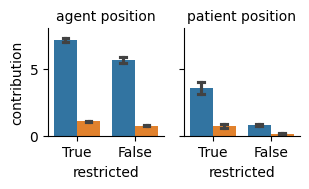

In [15]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & (contributions_df["class"] == "positive")
        ],
    hue="span", orient="v", kind="bar",
    col="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=2, aspect=0.8,
    x="animate_WK",
    legend=False
    )
plt.ylim(0, 8)
ax.set_ylabels("contribution")
ax.set_xlabels("restricted")
ax.set_titles("{col_name} position")

# ax.set_titles("")


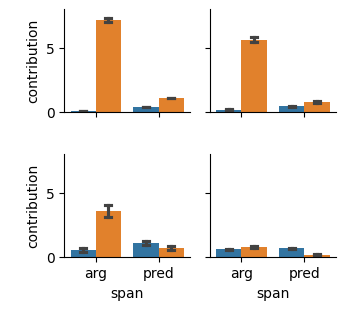

In [16]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1,
    col="animate_WK", legend_out=True, hue = "class", 
    # margin_titles=True
    # order=["arg", "mod", "pred", "other"]
    legend=False
    )
plt.ylim(0, 8)
ax.set_ylabels("\ncontribution")
# ax.set_titles("lexical={col_name} | position={row_name}")
ax.set_titles("")


## Lexical Semantics (Proto-Patient)

### Roberta

In [17]:
pd.read_csv("roberta_gcd_contributions.csv", index_col=0)["property"].value_counts()


property
awareness             4006
changes_location      4006
changes_state         4006
changes_possession    4006
existed_after         4006
existed_before        4006
existed_during        4006
instigation           4006
sentient              4006
volition              4006
Name: count, dtype: int64

In [32]:
contributions_df = pd.read_csv("roberta_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["changes_location", "changes_state", "changes_possession"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    # "modifier": "mod",
    "modifier": np.nan,
    "predicate": "pred",
    # "other_args": "other"
    "other_arguments": np.nan
}

contributions_df["span"] = contributions_df["span"].map(spans)
contributions_df = contributions_df.dropna(subset="span")
print(contributions_df.shape)
contributions_df.head()


contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(7584, 6)
(15030, 48)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_existed_before,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,changes_location
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,1.375816,agent,changes_location
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,changes_state
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,0.915707,agent,changes_state
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,0.427029,agent,changes_possession


In [33]:
# keep only rows where the property rating is >3 and the contribution is to that property
# contributions_df["property"] = contributions_df["property"].apply(
#     lambda x: x.replace("changes", "change_of")
# )
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x["roberta_" + x["property"].replace("changes", "change_of")]) == 2, axis=1
)

contributions_df["lexically_entailed"] = contributions_df.apply(
    lambda x: x["verb_" + x["property"].split("_")[-1]], axis=1
)


contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]

contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property,has_contribution_property,lexically_entailed
24,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,arg,negative,-0.000000,patient,changes_location,True,False
25,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,pred,negative,-0.000000,patient,changes_location,True,False
26,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,arg,negative,-0.000000,patient,changes_state,True,False
27,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,pred,negative,-0.000000,patient,changes_state,True,False
30,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,arg,positive,4.542271,patient,changes_location,True,False


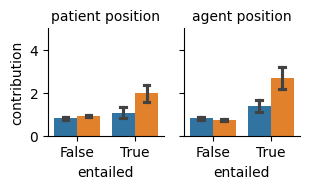

In [34]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & (contributions_df["class"] == "positive")
        ],
    hue="span", orient="v", kind="bar",
    col="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=2, aspect=0.8,
    x="lexically_entailed",
    legend=False
    )
plt.ylim(0, 5)
ax.set_ylabels("contribution")
ax.set_xlabels("entailed")
ax.set_titles("{col_name} position")

# ax.set_titles("")


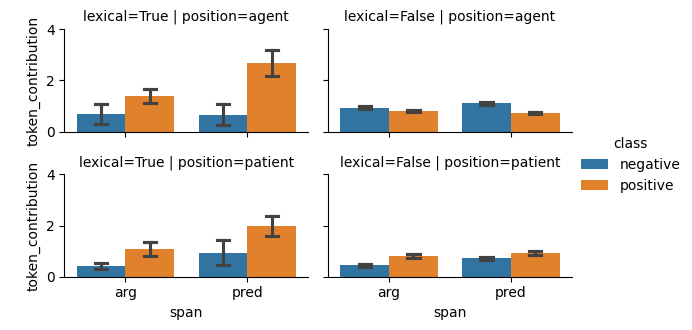

In [35]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        # & (contributions_df["property"] != "changes_possession")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="lexically_entailed", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"],
    row_order=["agent", "patient"]
    )
plt.ylim(0, 4)
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


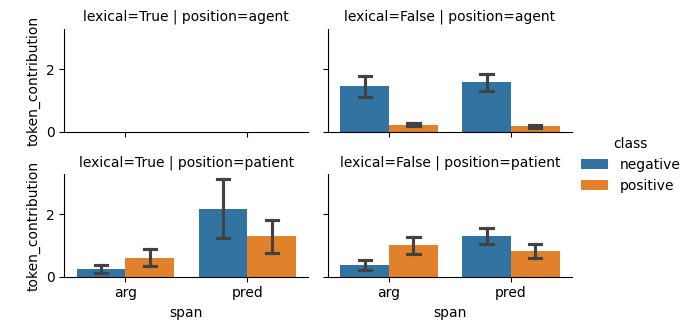

In [36]:

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "changes_possession")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_possession", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"],
    row_order=["agent", "patient"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


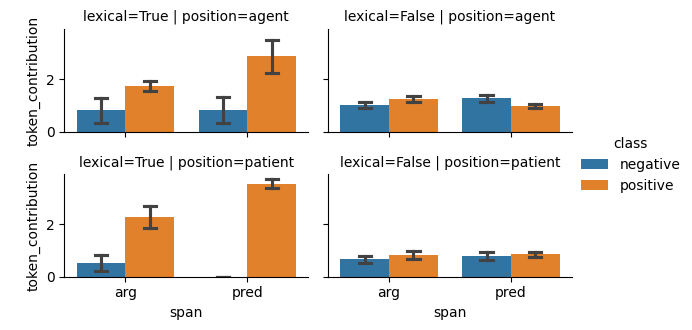

In [37]:
# change of location

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "changes_location")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_location", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"],
    row_order=["agent", "patient"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


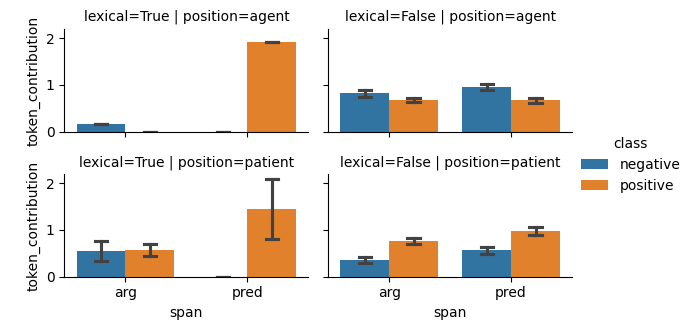

In [38]:
# change of state

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "changes_state")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_state", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"],
    row_order=["agent", "patient"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


### GPT-2

In [39]:
pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)["property"].value_counts()


property
awareness               4018
change_of_location      4018
change_of_state         4018
change_of_possession    4018
existed_after           4018
existed_before          4018
existed_during          4018
instigation             4018
sentient                4018
volition                4018
Name: count, dtype: int64

In [40]:
contributions_df = pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)
contributions_df["span"].value_counts()


span
predicate     12780
argument      12500
other_args     9760
modifier       5140
Name: count, dtype: int64

In [41]:
contributions_df = pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["change_of_location", "change_of_state", "change_of_possession"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    # "modifier": "mod",
    "modifier": np.nan,
    "predicate": "pred",
    # "other_args": "other"
    "other_args": np.nan
}

contributions_df["span"] = contributions_df["span"].map(spans)
contributions_df = contributions_df.dropna(subset="span")
print(contributions_df.shape)
contributions_df.head()


(7584, 6)


,index,span,class,per_token_contribution,position,property
2009,14299,arg,negative,-0.000000,agent,change_of_location
2010,14301,arg,negative,-0.000000,patient,change_of_location
2011,14303,arg,negative,0.245499,agent,change_of_location
2012,14305,arg,negative,-0.000000,agent,change_of_location
2013,14307,arg,negative,-0.000000,agent,change_of_location


In [42]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(15030, 48)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_existed_before,gpt_existed_during,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,change_of_location
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,0.865442,agent,change_of_location
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,-0.000000,agent,change_of_state
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,pred,negative,0.503656,agent,change_of_state
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,A girl,A girl raises her hand .,True,True,True,...,2.0,2.0,2.0,2.0,2.0,arg,negative,0.121922,agent,change_of_possession


In [43]:
# keep only rows where the property rating is >3 and the contribution is to that property
# contributions_df["property"] = contributions_df["property"].apply(
#     lambda x: x.replace("changes", "change_of")
# )
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x["gpt_" + x["property"]]) == 2, axis=1
)

contributions_df["lexically_entailed"] = contributions_df.apply(
    lambda x: x["verb_" + x["property"].split("_")[-1]], axis=1
)


contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]

contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,arg,sentence,has_mapping,animate_STR,animate_WK,...,gpt_instigation,gpt_sentient,gpt_volition,span,class,per_token_contribution,position,property,has_contribution_property,lexically_entailed
24,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,arg,negative,-0.000000,patient,change_of_location,True,False
25,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,pred,negative,-0.000000,patient,change_of_location,True,False
26,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,arg,negative,0.734881,patient,change_of_state,True,False
27,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,pred,negative,-0.000000,patient,change_of_state,True,False
30,14301,raise,en-ud-test.conllu 1002,dobj,the hand,her hand,A girl raises her hand .,True,False,False,...,0.0,0.0,0.0,arg,positive,7.625300,patient,change_of_location,True,False


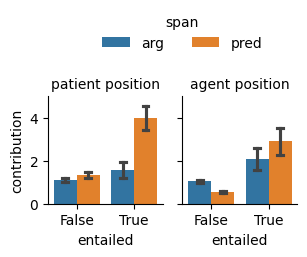

In [44]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & (contributions_df["class"] == "positive")
        ],
    hue="span", orient="v", kind="bar",
    col="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=2, aspect=0.8,
    x="lexically_entailed",
    # legend=False
    )
plt.ylim(0, 5)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, frameon=False)
ax.set_ylabels("contribution")
ax.set_xlabels("entailed")
ax.set_titles("{col_name} position")

# ax.set_titles("")


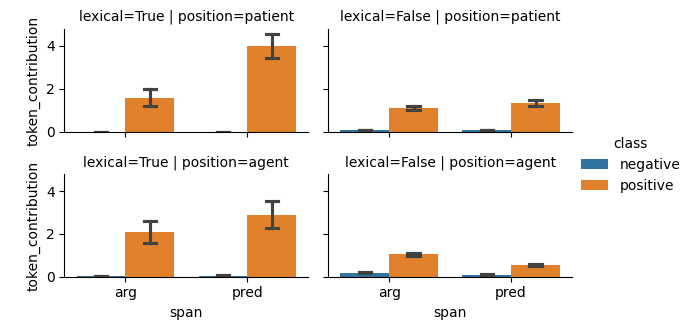

In [45]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="lexically_entailed", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"]
    )
# plt.ylim(0, 0.4)
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


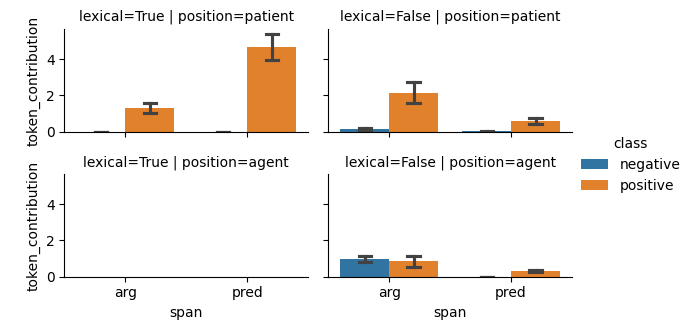

In [46]:

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "change_of_possession")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_possession", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


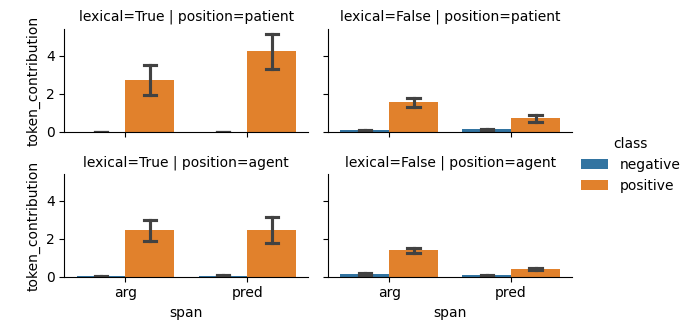

In [47]:
# change of location

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "change_of_location")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_location", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


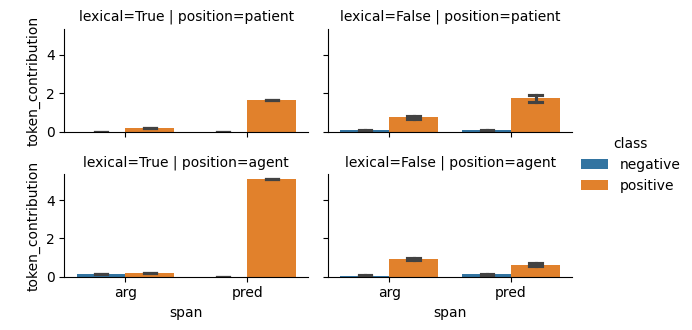

In [48]:
# change of state

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "change_of_state")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_state", legend_out=True, hue = "class", 
    col_order=["True", "False"],
    # order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")
